In [1]:
import pandas as pd 
import numpy as np 
dataset = pd.read_csv(r"C:\Users\jesun\Desktop\BURGS - AR Privacy\Development\ar-privacy\BurgsDevelopment\Jai Data Analysis\blinds.csv")
dataset.keys()

Index(['time', 'events', 'wearable', 'soc', 'cvip', 'cpu', 'gpu', '5v_sys',
       'wlan', 'nvme_pwr1', 'nvme_pwr3', 'nvme_pwr2', 'vddp_run', 'vddp_s5',
       'LPDDR_PWR', 'PROC_TOT_PWR', 'THERM_TOT_PWR', 'THERM_TOT_PWR-throttle',
       'Tboard_soc1tmp', 'Tdiode_soc1tmp', 'battery', 'chrgr', 'ddr1', 'ddr2',
       'mem', 'mero2', 'vrm'],
      dtype='object')

In [2]:
print(dataset)

         time  events  wearable      soc     cvip      cpu      gpu   5v_sys  \
0       0.003     NaN   4423000  1050000  2138000  1080000   105000  5070000   
1       0.203     NaN   4423000  1110000  1315000   630000   105000  4891000   
2       0.403     NaN   4423000  1296000  1496000   853000   105000  4891000   
3       0.603     NaN   4456000  1184000  2043000  1134000   105000  4891000   
4       0.803     NaN   4456000  1265000  1995000   711000  2864000  5130000   
...       ...     ...       ...      ...      ...      ...      ...      ...   
1255  251.003     NaN   5023000  1162000  2399000  1242000   963000  5771000   
1256  251.203     NaN   4886000  1376000  1496000   731000   105000  5745000   
1257  251.402     NaN   4886000  1442000  1354000  1129000  1215000  5745000   
1258  251.602     NaN   4886000  1176000  1267000  1895000   105000  5745000   
1259  251.802     NaN   4731000  1398000  1354000   772000   105000  5566000   

        wlan  nvme_pwr1  ...  THERM_TOT

In [7]:
X= dataset.iloc[:, 1:]
print(X)

      events  wearable      soc     cvip      cpu      gpu   5v_sys    wlan  \
0        NaN   4423000  1050000  2138000  1080000   105000  5070000  125000   
1        NaN   4423000  1110000  1315000   630000   105000  4891000  125000   
2        NaN   4423000  1296000  1496000   853000   105000  4891000  246000   
3        NaN   4456000  1184000  2043000  1134000   105000  4891000  246000   
4        NaN   4456000  1265000  1995000   711000  2864000  5130000  229000   
...      ...       ...      ...      ...      ...      ...      ...     ...   
1255     NaN   5023000  1162000  2399000  1242000   963000  5771000  212000   
1256     NaN   4886000  1376000  1496000   731000   105000  5745000  203000   
1257     NaN   4886000  1442000  1354000  1129000  1215000  5745000  203000   
1258     NaN   4886000  1176000  1267000  1895000   105000  5745000  203000   
1259     NaN   4731000  1398000  1354000   772000   105000  5566000  228000   

      nvme_pwr1  nvme_pwr3  ...  THERM_TOT_PWR-thro

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

C:\Users\jesun\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['events']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = scaler.fit(X)
scaled_X = model.transform(X)

In [11]:
from sklearn.decomposition import PCA
pca1 = PCA()
X_pca1 = pca1.fit_transform(scaled_X)
X.shape

(1260, 25)

In [15]:
#variation shows how much variance each category has 
pca1.explained_variance_ratio_

array([6.52966817e-01, 8.95977256e-02, 6.56901631e-02, 4.77697138e-02,
       3.81006950e-02, 2.54465556e-02, 1.78056975e-02, 1.61059729e-02,
       1.29265771e-02, 1.08900621e-02, 6.03117114e-03, 5.28214307e-03,
       4.16430809e-03, 3.34683919e-03, 1.49632695e-03, 1.13416911e-03,
       6.46849993e-04, 4.11740283e-04, 1.45051309e-04, 2.00477241e-05,
       9.93372285e-06, 6.84365690e-06, 4.59591953e-06, 5.70191915e-32,
       1.80637009e-36])

[]

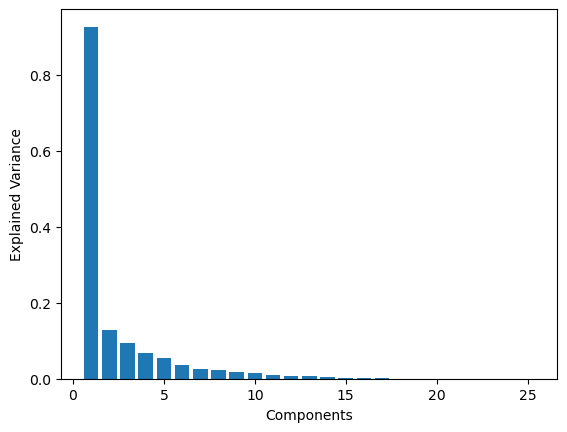

In [17]:
import matplotlib.pyplot as plt 
plt.bar(range(1,len(pca1.explained_variance_)+1),pca1.explained_variance_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.plot()

Text(0, 0.5, 'Explained Variance')

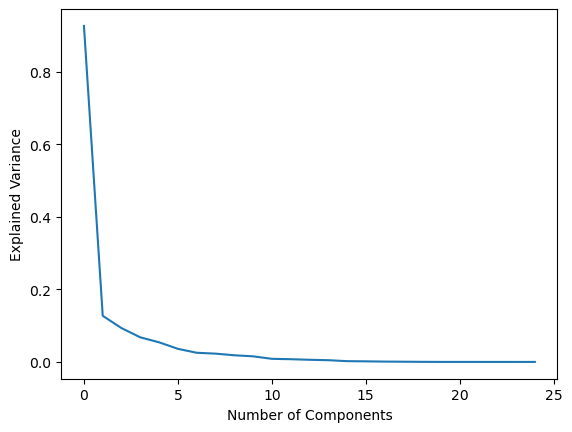

In [18]:
plt.plot(pca1.explained_variance_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [21]:
#getting the components that explain about 95% of the variance in the data 
pca2 = PCA(0.95)
X_pca2 = pca2.fit_transform(scaled_X)
X_pca2.shape

(1260, 8)

In [23]:
#getting the top 2 components 
pca3 = PCA(n_components=2)
X_pca3 = pca3.fit_transform(scaled_X)

In [28]:
loadings = pd.DataFrame(pca3.components_.T, columns=['PC1', 'PC2'], index=dataset.columns[:25])

In [ ]:
print(loadings)